<a href="https://colab.research.google.com/github/thasliya0404/class-activity/blob/main/ETL_casestudy_thasliya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sqlite3

In [2]:
#Load dataset
url = 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv'
data = pd.read_csv(url)
data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-09-21T14:09:14.470Z,33.936333,-116.677167,14.4300,1.24,ml,70.0,22.0,0.08250,0.16,...,2025-09-21T14:13:32.763Z,"10 km ENE of Cabazon, CA",earthquake,0.120000,0.240000,0.138000,26.0,reviewed,ci,ci
1,2025-09-21T13:56:53.920Z,35.393500,-117.748667,5.9100,0.97,ml,38.0,62.0,0.10160,0.13,...,2025-09-21T14:13:41.254Z,"11 km WNW of Johannesburg, CA",earthquake,0.140000,0.490000,0.168000,19.0,reviewed,ci,ci
2,2025-09-21T13:56:33.600Z,38.769333,-122.730164,2.1200,1.13,md,9.0,64.0,0.00877,0.01,...,2025-09-21T13:58:09.704Z,"2 km ESE of The Geysers, CA",earthquake,0.520000,0.900000,0.330000,9.0,automatic,nc,nc
3,2025-09-21T13:50:53.610Z,33.031500,-116.292333,6.8000,0.33,ml,20.0,56.0,0.07725,0.20,...,2025-09-21T13:54:24.380Z,"20 km SW of Ocotillo Wells, CA",earthquake,0.300000,0.750000,0.174000,3.0,automatic,ci,ci
4,2025-09-21T13:46:15.460Z,35.638833,-117.456000,7.0700,0.95,ml,27.0,54.0,0.03714,0.14,...,2025-09-21T14:15:28.660Z,"15 km SSW of Searles Valley, CA",earthquake,0.190000,0.410000,0.170000,13.0,reviewed,ci,ci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9901,2025-08-22T14:44:35.530Z,54.751333,-163.968500,1.4900,0.07,ml,7.0,81.0,0.04514,0.25,...,2025-08-23T05:33:00.640Z,"37 km WSW of False Pass, Alaska",earthquake,0.600000,1.220000,0.139542,7.0,reviewed,av,av
9902,2025-08-22T14:35:52.950Z,19.326000,-155.163167,3.4500,2.18,ml,53.0,92.0,0.05128,0.11,...,2025-09-20T12:49:27.040Z,"14 km SSE of Volcano, Hawaii",earthquake,0.240000,0.860000,0.240140,39.0,reviewed,hv,hv
9903,2025-08-22T14:31:19.677Z,31.560000,-104.128000,7.0227,0.90,ml,17.0,66.0,0.00000,0.10,...,2025-09-05T15:50:08.345Z,"41 km NW of Toyah, Texas",earthquake,0.848763,0.675064,0.200000,18.0,reviewed,tx,tx
9904,2025-08-22T14:28:02.476Z,62.078100,-150.638800,9.9000,1.20,ml,NaN,NaN,NaN,0.48,...,2025-08-22T14:30:54.881Z,"34 km SW of Trapper Creek, Alaska",earthquake,NaN,0.300000,NaN,NaN,automatic,ak,ak


In [3]:
data.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [4]:
#no. of records
print("Number of records:", len(data))

Number of records: 9906


In [5]:
#unique locations
print("Unique locations:", data["place"].nunique())

Unique locations: 5250


In [19]:
data['place'].unique()

array(['10 km ENE of Cabazon, CA', '11 km WNW of Johannesburg, CA',
       '2 km ESE of The Geysers, CA', ..., '7 km ESE of Willits, CA',
       '17 km NNE of Four Mile Road, Alaska', '3 km S of Highland, CA'],
      dtype=object)

In [6]:
#Print top 5 rows and column names
data.columns.tolist()

['time',
 'latitude',
 'longitude',
 'depth',
 'mag',
 'magType',
 'nst',
 'gap',
 'dmin',
 'rms',
 'net',
 'id',
 'updated',
 'place',
 'type',
 'horizontalError',
 'depthError',
 'magError',
 'magNst',
 'status',
 'locationSource',
 'magSource']

In [7]:
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-09-21T14:09:14.470Z,33.936333,-116.677167,14.43,1.24,ml,70.0,22.0,0.08250,0.16,...,2025-09-21T14:13:32.763Z,"10 km ENE of Cabazon, CA",earthquake,0.12,0.24,0.138,26.0,reviewed,ci,ci
1,2025-09-21T13:56:53.920Z,35.393500,-117.748667,5.91,0.97,ml,38.0,62.0,0.10160,0.13,...,2025-09-21T14:13:41.254Z,"11 km WNW of Johannesburg, CA",earthquake,0.14,0.49,0.168,19.0,reviewed,ci,ci
2,2025-09-21T13:56:33.600Z,38.769333,-122.730164,2.12,1.13,md,9.0,64.0,0.00877,0.01,...,2025-09-21T13:58:09.704Z,"2 km ESE of The Geysers, CA",earthquake,0.52,0.90,0.330,9.0,automatic,nc,nc
3,2025-09-21T13:50:53.610Z,33.031500,-116.292333,6.80,0.33,ml,20.0,56.0,0.07725,0.20,...,2025-09-21T13:54:24.380Z,"20 km SW of Ocotillo Wells, CA",earthquake,0.30,0.75,0.174,3.0,automatic,ci,ci
4,2025-09-21T13:46:15.460Z,35.638833,-117.456000,7.07,0.95,ml,27.0,54.0,0.03714,0.14,...,2025-09-21T14:15:28.660Z,"15 km SSW of Searles Valley, CA",earthquake,0.19,0.41,0.170,13.0,reviewed,ci,ci


In [8]:
#Convert time to datetime
data["time"] = pd.to_datetime(data["time"])
pd.to_datetime(data["time"])

,time
0,2025-09-21 14:09:14.470000+00:00
1,2025-09-21 13:56:53.920000+00:00
2,2025-09-21 13:56:33.600000+00:00
3,2025-09-21 13:50:53.610000+00:00
4,2025-09-21 13:46:15.460000+00:00
...,...
9901,2025-08-22 14:44:35.530000+00:00
9902,2025-08-22 14:35:52.950000+00:00
9903,2025-08-22 14:31:19.677000+00:00
9904,2025-08-22 14:28:02.476000+00:00


In [9]:
#Drop records with missing latitude, longitude, mag
data = data.dropna(subset=["latitude", "longitude", "mag"])
data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-09-21 14:09:14.470000+00:00,33.936333,-116.677167,14.4300,1.24,ml,70.0,22.0,0.08250,0.16,...,2025-09-21T14:13:32.763Z,"10 km ENE of Cabazon, CA",earthquake,0.120000,0.240000,0.138000,26.0,reviewed,ci,ci
1,2025-09-21 13:56:53.920000+00:00,35.393500,-117.748667,5.9100,0.97,ml,38.0,62.0,0.10160,0.13,...,2025-09-21T14:13:41.254Z,"11 km WNW of Johannesburg, CA",earthquake,0.140000,0.490000,0.168000,19.0,reviewed,ci,ci
2,2025-09-21 13:56:33.600000+00:00,38.769333,-122.730164,2.1200,1.13,md,9.0,64.0,0.00877,0.01,...,2025-09-21T13:58:09.704Z,"2 km ESE of The Geysers, CA",earthquake,0.520000,0.900000,0.330000,9.0,automatic,nc,nc
3,2025-09-21 13:50:53.610000+00:00,33.031500,-116.292333,6.8000,0.33,ml,20.0,56.0,0.07725,0.20,...,2025-09-21T13:54:24.380Z,"20 km SW of Ocotillo Wells, CA",earthquake,0.300000,0.750000,0.174000,3.0,automatic,ci,ci
4,2025-09-21 13:46:15.460000+00:00,35.638833,-117.456000,7.0700,0.95,ml,27.0,54.0,0.03714,0.14,...,2025-09-21T14:15:28.660Z,"15 km SSW of Searles Valley, CA",earthquake,0.190000,0.410000,0.170000,13.0,reviewed,ci,ci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9901,2025-08-22 14:44:35.530000+00:00,54.751333,-163.968500,1.4900,0.07,ml,7.0,81.0,0.04514,0.25,...,2025-08-23T05:33:00.640Z,"37 km WSW of False Pass, Alaska",earthquake,0.600000,1.220000,0.139542,7.0,reviewed,av,av
9902,2025-08-22 14:35:52.950000+00:00,19.326000,-155.163167,3.4500,2.18,ml,53.0,92.0,0.05128,0.11,...,2025-09-20T12:49:27.040Z,"14 km SSE of Volcano, Hawaii",earthquake,0.240000,0.860000,0.240140,39.0,reviewed,hv,hv
9903,2025-08-22 14:31:19.677000+00:00,31.560000,-104.128000,7.0227,0.90,ml,17.0,66.0,0.00000,0.10,...,2025-09-05T15:50:08.345Z,"41 km NW of Toyah, Texas",earthquake,0.848763,0.675064,0.200000,18.0,reviewed,tx,tx
9904,2025-08-22 14:28:02.476000+00:00,62.078100,-150.638800,9.9000,1.20,ml,NaN,NaN,NaN,0.48,...,2025-08-22T14:30:54.881Z,"34 km SW of Trapper Creek, Alaska",earthquake,NaN,0.300000,NaN,NaN,automatic,ak,ak


In [10]:
#Filter only earthquakes with magnitude >= 4.0
data1 = data[data["mag"] >= 4.0]
data1

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
9,2025-09-21 13:28:44.745000+00:00,65.8338,-37.4416,10.000,4.6,mb,39.0,123.0,5.4190,0.81,...,2025-09-21T13:52:58.040Z,"26 km NNE of Tasiilaq, Greenland",earthquake,10.19,1.919,0.036,227.0,reviewed,us,us
19,2025-09-21 11:07:35.234000+00:00,50.9904,159.0834,27.703,4.5,mb,34.0,215.0,2.0540,0.84,...,2025-09-21T11:29:02.040Z,"188 km ESE of Ozernovskiy, Russia",earthquake,15.55,7.382,0.094,33.0,reviewed,us,us
22,2025-09-21 10:30:54.743000+00:00,2.8209,95.3997,18.872,4.4,mb,36.0,204.0,2.6450,0.49,...,2025-09-21T12:11:20.040Z,"115 km WNW of Sinabang, Indonesia",earthquake,9.79,6.379,0.110,24.0,reviewed,us,us
32,2025-09-21 09:30:27.882000+00:00,51.2024,-178.0199,30.000,5.5,mww,147.0,42.0,0.5590,1.08,...,2025-09-21T13:40:36.354Z,"121 km SW of Adak, Alaska",earthquake,3.97,1.809,0.046,46.0,reviewed,us,us
36,2025-09-21 09:08:58.898000+00:00,-31.9244,-66.9156,138.171,4.6,mb,99.0,51.0,1.5420,0.68,...,2025-09-21T09:28:39.040Z,"93 km NNW of Villa General Roca, Argentina",earthquake,6.85,7.301,0.035,251.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9852,2025-08-22 17:11:05.982000+00:00,-60.3121,-62.3660,10.000,4.3,mb,10.0,152.0,4.5460,1.23,...,2025-09-17T19:50:48.040Z,Drake Passage,earthquake,16.52,1.949,0.189,9.0,reviewed,us,us
9865,2025-08-22 16:28:42.530000+00:00,18.8243,-67.2471,10.000,4.3,ml,27.0,186.0,0.3818,0.21,...,2025-09-20T19:17:56.040Z,"39 km NNW of San Antonio, Puerto Rico",earthquake,0.60,0.850,0.090,22.0,reviewed,pr,pr
9866,2025-08-22 16:25:22.017000+00:00,52.2884,160.9574,10.000,4.8,mb,37.0,192.0,1.5870,0.89,...,2025-09-20T17:04:39.040Z,"179 km ESE of Petropavlovsk-Kamchatsky, Russia",earthquake,12.65,1.960,0.060,85.0,reviewed,us,us
9879,2025-08-22 15:57:35.988000+00:00,51.2884,159.4807,10.000,5.1,mb,77.0,117.0,1.8110,0.81,...,2025-09-20T16:48:10.040Z,"197 km SSE of Vilyuchinsk, Russia",earthquake,8.32,1.873,0.049,134.0,reviewed,us,us


In [20]:
data1['mag'].unique()

array([4.6 , 4.5 , 4.4 , 5.5 , 4.9 , 5.1 , 4.8 , 5.2 , 4.3 , 5.7 , 4.1 ,
       4.2 , 4.7 , 5.  , 5.3 , 5.9 , 5.4 , 4.06, 5.6 , 5.8 , 7.8 , 6.1 ,
       6.  , 4.  , 7.4 , 4.13, 4.01, 6.4 , 4.14])

In [22]:
#Add a column day_of_week from time
data["day_of_week"] = data["time"].dt.day_name()
data["day_of_week"]

/tmp/ipython-input-1412797608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["day_of_week"] = data["time"].dt.day_name()


,day_of_week
0,Sunday
1,Sunday
2,Sunday
3,Sunday
4,Sunday
...,...
9901,Friday
9902,Friday
9903,Friday
9904,Friday


In [12]:
#Create a column severity_level based on magnitude:
def severity(mag):
    if mag < 4.0:
        return "Low"
    elif 4.0 <= mag < 6.0:
        return "Moderate"
    else:
        return "High"

data["severity_level"] = data["mag"].apply(severity)
data["severity_level"]

/tmp/ipython-input-692314385.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["severity_level"] = data["mag"].apply(severity)


,severity_level
0,Low
1,Low
2,Low
3,Low
4,Low
...,...
9901,Low
9902,Low
9903,Low
9904,Low


In [13]:
#Count number of earthquakes per place
place_count = data["place"].value_counts().reset_index()
place_count.columns = ["place", "earthquake_count"]
place_count

,place,earthquake_count
0,"15 km NE of Milford, Utah",203
1,"27 km W of Hebgen Lake Estates, Montana",82
2,"7 km WNW of Cobb, CA",59
3,"7 km NNW of The Geysers, CA",57
4,"6 km WNW of Cobb, CA",50
...,...,...
5244,"7 km NNE of Kings Beach, CA",1
5245,"6 km NNW of Incline Village, Nevada",1
5246,"64 km WSW of Rosarito, B.C., MX",1
5247,"135 km S of Modisi, Indonesia",1


In [14]:
#Compute average magnitude and max depth per day
summary = data.groupby(data["time"].dt.date).agg(avg_magnitude=("mag", "mean"),max_depth=("depth", "max")).reset_index()
summary

,time,avg_magnitude,max_depth
0,2025-08-22,1.320927,515.056
1,2025-08-23,1.565403,565.087
2,2025-08-24,1.442605,499.800
3,2025-08-25,1.228933,126.766
4,2025-08-26,1.394417,612.812
5,2025-08-27,1.336623,128.261
6,2025-08-28,1.313672,260.716
7,2025-08-29,1.274347,541.434
8,2025-08-30,1.409890,206.809
9,2025-08-31,1.412689,554.091


In [15]:
#Save: Cleaned dataset to cleaned_earthquakes.csv, Summary data to earthquake_summary.csv
data.to_csv("cleaned_earthquakes.csv", index=False)
summary.to_csv("earthquake_summary.csv", index=False)

In [16]:
data2 = pd.read_csv("/content/cleaned_earthquakes.csv")
data2

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,day_of_week,severity_level
0,2025-09-21 14:09:14.470000+00:00,33.936333,-116.677167,14.4300,1.24,ml,70.0,22.0,0.08250,0.16,...,earthquake,0.120000,0.240000,0.138000,26.0,reviewed,ci,ci,Sunday,Low
1,2025-09-21 13:56:53.920000+00:00,35.393500,-117.748667,5.9100,0.97,ml,38.0,62.0,0.10160,0.13,...,earthquake,0.140000,0.490000,0.168000,19.0,reviewed,ci,ci,Sunday,Low
2,2025-09-21 13:56:33.600000+00:00,38.769333,-122.730164,2.1200,1.13,md,9.0,64.0,0.00877,0.01,...,earthquake,0.520000,0.900000,0.330000,9.0,automatic,nc,nc,Sunday,Low
3,2025-09-21 13:50:53.610000+00:00,33.031500,-116.292333,6.8000,0.33,ml,20.0,56.0,0.07725,0.20,...,earthquake,0.300000,0.750000,0.174000,3.0,automatic,ci,ci,Sunday,Low
4,2025-09-21 13:46:15.460000+00:00,35.638833,-117.456000,7.0700,0.95,ml,27.0,54.0,0.03714,0.14,...,earthquake,0.190000,0.410000,0.170000,13.0,reviewed,ci,ci,Sunday,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9900,2025-08-22 14:44:35.530000+00:00,54.751333,-163.968500,1.4900,0.07,ml,7.0,81.0,0.04514,0.25,...,earthquake,0.600000,1.220000,0.139542,7.0,reviewed,av,av,Friday,Low
9901,2025-08-22 14:35:52.950000+00:00,19.326000,-155.163167,3.4500,2.18,ml,53.0,92.0,0.05128,0.11,...,earthquake,0.240000,0.860000,0.240140,39.0,reviewed,hv,hv,Friday,Low
9902,2025-08-22 14:31:19.677000+00:00,31.560000,-104.128000,7.0227,0.90,ml,17.0,66.0,0.00000,0.10,...,earthquake,0.848763,0.675064,0.200000,18.0,reviewed,tx,tx,Friday,Low
9903,2025-08-22 14:28:02.476000+00:00,62.078100,-150.638800,9.9000,1.20,ml,NaN,NaN,NaN,0.48,...,earthquake,NaN,0.300000,NaN,NaN,automatic,ak,ak,Friday,Low


In [17]:
data3 = pd.read_csv("/content/earthquake_summary.csv")
data3

,time,avg_magnitude,max_depth
0,2025-08-22,1.320927,515.056
1,2025-08-23,1.565403,565.087
2,2025-08-24,1.442605,499.800
3,2025-08-25,1.228933,126.766
4,2025-08-26,1.394417,612.812
5,2025-08-27,1.336623,128.261
6,2025-08-28,1.313672,260.716
7,2025-08-29,1.274347,541.434
8,2025-08-30,1.409890,206.809
9,2025-08-31,1.412689,554.091


In [18]:
#Store into SQLite table
conn = sqlite3.connect("earthquakes.db")
data.to_sql("earthquakes", conn, if_exists="replace", index=False)
summary.to_sql("earthquake_summary", conn, if_exists="replace", index=False)
conn.close()

In [33]:
print(" Cleaned dataset stored in table 'cleaned_earthquakes'")
print(" earthquake daily summary stored in table 'earthquake_daily_summary'")

 Cleaned dataset stored in table 'cleaned_earthquakes'
 earthquake daily summary stored in table 'earthquake_daily_summary'


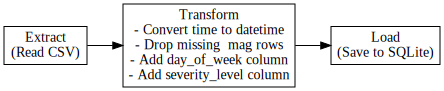

In [34]:
#Flow chart
from graphviz import Digraph
from IPython.display import display

# Create directed graph
dot = Digraph('ETL', format='png')
dot.attr(rankdir='LR')  # Left to right layout

# --- Nodes ---
dot.node('E', 'Extract\n(Read CSV)', shape='box', color='black')
dot.node('T', '''Transform
- Convert time to datetime
- Drop missing  mag rows
- Add day_of_week column
- Add severity_level column''', shape='box', color='black')
dot.node('L', 'Load\n(Save to SQLite)', shape='box', color='black')

# --- Edges ---
dot.edge('E', 'T')
dot.edge('T', 'L')

# Display directly in notebook/Colab
display(dot)

extracted earthquake data from a CSV file into Pandas for processing. During transformation, cleaned missing values of magnitudes, converted time to datetime, filtered earthquakes with magnitude ≥ 4.0, engineered new features like day_of_week and severity_level, and aggregated statistics per place and per day. Finally, loaded both the cleaned dataset and summary tables into a SQLite database for storage and analysis.

One insight your team discovered from the data

In [25]:
import matplotlib.pyplot as plt

In [27]:
data.isna().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,1139
gap,1139
dmin,1140
rms,0


In [28]:
summary = data.groupby('type').agg(
    avg_magnitude=('mag', 'mean'),
    max_magnitude=('mag', 'max'),
    avg_depth=('depth', 'mean'),
    max_depth=('depth', 'max'),
    count=('type', 'count')
).reset_index()

print("Summary by Type:\n", summary)

Summary by Type:
            type  avg_magnitude  max_magnitude  avg_depth  max_depth  count
0    earthquake       1.439744           7.80  17.018798    639.511   9718
1     explosion       1.435410           2.24  -0.166557     16.000     61
2     landslide       1.400000           1.40   0.000000      0.000      1
3  quarry blast       1.352960           2.10  -0.506480      5.590    125


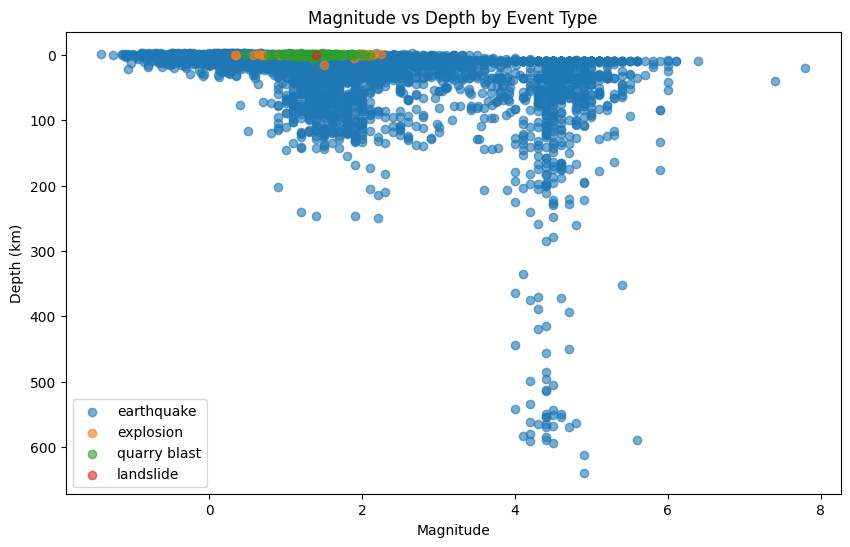

In [30]:
plt.figure(figsize=(10,6))
for t in data['type'].unique():
    subset = data[data['type'] == t]
    plt.scatter(subset['mag'], subset['depth'], label=t, alpha=0.6)

plt.gca().invert_yaxis()  # Depth increases downwards in real life
plt.xlabel("Magnitude")
plt.ylabel("Depth (km)")
plt.title("Magnitude vs Depth by Event Type")
plt.legend()
plt.show()

Earthquakes occur across a wide range of depths (up to 640 km) and magnitudes (up to 7.8), while quarry blasts and explosions are consistently shallow (near 0 km) and weak (<2.5 magnitude).

In [32]:
# Count number of earthquakes per place
place_counts = data.groupby('place').size().reset_index(name='earthquake_count')

# Average magnitude per place
place_magnitude = data.groupby('place')['mag'].mean().reset_index(name='avg_magnitude')

# Merge both summaries
place_summary = pd.merge(place_counts, place_magnitude, on='place')

# Sort by earthquake count (Top 10 places)
top_places = place_summary.sort_values(by='earthquake_count', ascending=False).head(10)

print("Top 10 Places by Earthquake Frequency with Average Magnitude:\n")
print(top_places)

Top 10 Places by Earthquake Frequency with Average Magnitude:

                                        place  earthquake_count  avg_magnitude
1060                15 km NE of Milford, Utah               203       1.023596
2335  27 km W of Hebgen Lake Estates, Montana                82       0.572683
4493                     7 km WNW of Cobb, CA                59       0.859831
4405              7 km NNW of The Geysers, CA                57       0.935263
4085                     6 km WNW of Cobb, CA                50       0.704200
4723              8 km NNW of The Geysers, CA                49       0.934490
3867       56 km S of Whites City, New Mexico                47       1.468085
3422              47 km ESE of Beatty, Nevada                47      -0.023404
2980          38 km WSW of False Pass, Alaska                46       0.373696
1872             21 km ESE of Little Lake, CA                46       0.793043
